In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import math
import pandas as pd

In [93]:
text = cv2.imread('../data/text.jpg', 0)[:600, :]
text.shape

(600, 795)

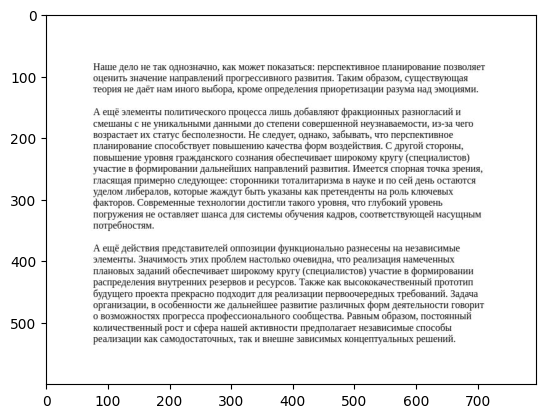

In [94]:
plt.imshow(text, cmap='gray')

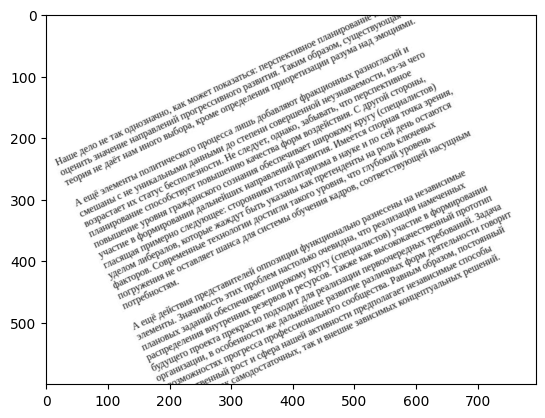

In [95]:
text_neg = np.zeros_like(text)+255 - text
text_rot = imutils.rotate(text_neg, angle=25)
text_rot = np.zeros_like(text_rot)+255 - text_rot
plt.imshow(text_rot, cmap='gray')

In [96]:
text_rot

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

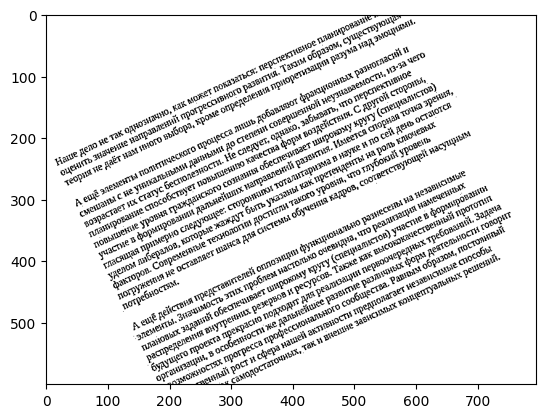

In [97]:
#очистка от шумов
im_bw = cv2.adaptiveThreshold(text_rot, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10)
plt.imshow(im_bw, cmap='gray')

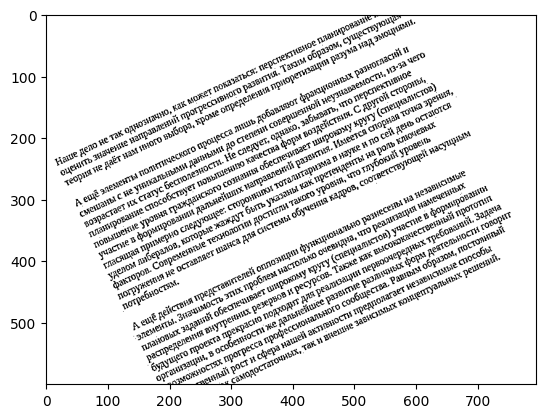

In [98]:
#изменение размера
final_wide = text.shape[1] 
r = float(final_wide) / text_rot.shape[1]
dim = (final_wide, int(text_rot.shape[0] * r))
resized = cv2.resize(im_bw, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap='gray')

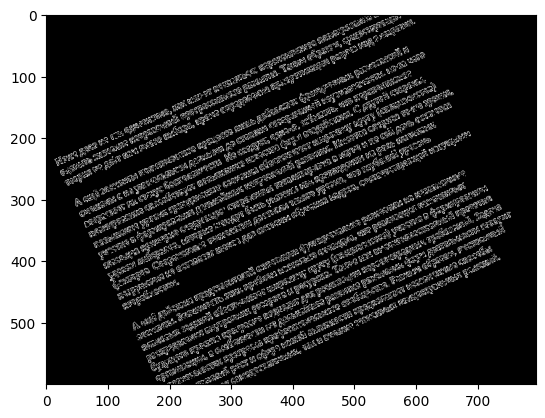

In [99]:
#выделение границ Кэнни
dst = cv2.Canny(resized,1500,1000)

cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR) 
cdstP = np.copy(cdst) 
plt.imshow(cdstP, cmap='gray')

In [100]:
#преобразование Хаффа
lines = cv2.HoughLines(dst, 1, np.pi / 120, 100, None, 0, 0)
lines

array([[[614.       ,   1.1257374]],

       [[575.       ,   1.1257374]],

       [[303.       ,   1.1257374]],

       ...,

       [[ 49.       ,   2.3561945]],

       [[ 59.       ,   2.3561945]],

       [[ 62.       ,   2.3561945]]], dtype=float32)

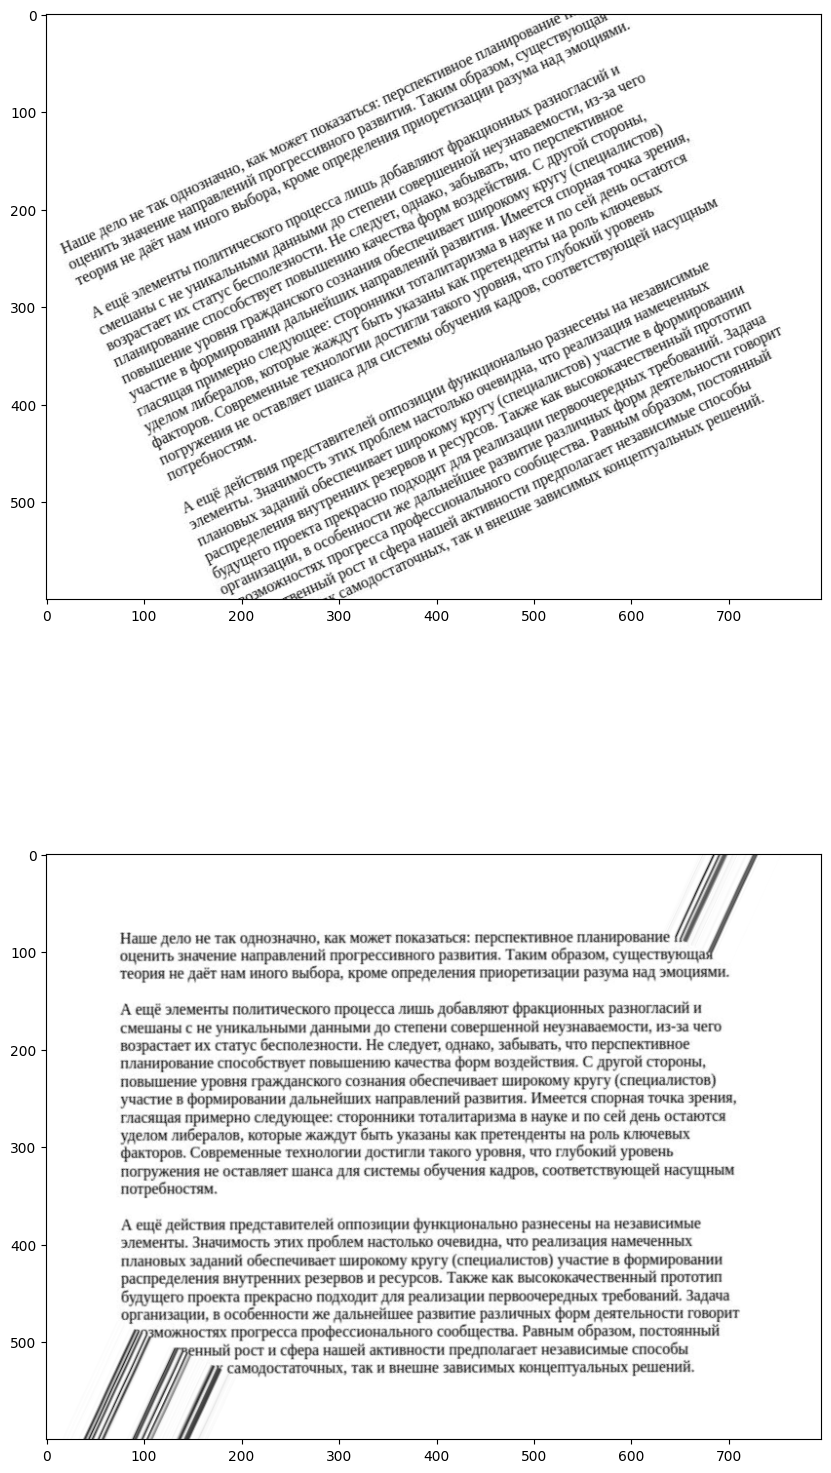

In [101]:
coner_array = [] 
if lines is not None: 
    for i in range(0, len(lines)): 
        rho = lines[i][0][0] 
        theta = lines[i][0][1] 
        a = math.cos(theta) 
        b = math.sin(theta) 
        x0 = a * rho 
        y0 = b * rho 
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a))) 
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a))) 
        cv2.line(cdst, pt1, pt2, (0,0,255), 1, cv2.LINE_AA) 

    linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 20, 10)

    if linesP is not None: 
        for i in range(0, len(linesP)): 
            l = linesP[i][0] 
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA) 
            coner_array.append(math.degrees(math.atan((l[3]-l[1])/(l[2]-l[0]))))

    coner=np.mean(coner_array) 
    (h, w) = text_rot.shape[:2] 
    center = (w / 2, h / 2)  
    M = cv2.getRotationMatrix2D(center, coner, 1.0) 
    binrotated = cv2.warpAffine(text_rot, M, (w, h),  borderMode=cv2.BORDER_REPLICATE) 
    rotated = cv2.warpAffine(text_rot.copy(), M, (w, h),  borderMode=cv2.BORDER_REPLICATE)
    
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(10, 20))
ax[0].imshow(text_rot, cmap='gray')
ax[1].imshow(rotated, cmap='gray')

In [102]:
lines.shape

(2251, 1, 2)

In [103]:
img = text_rot.copy()
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255))
cv2.imwrite('houghlines3.jpg',img)


True

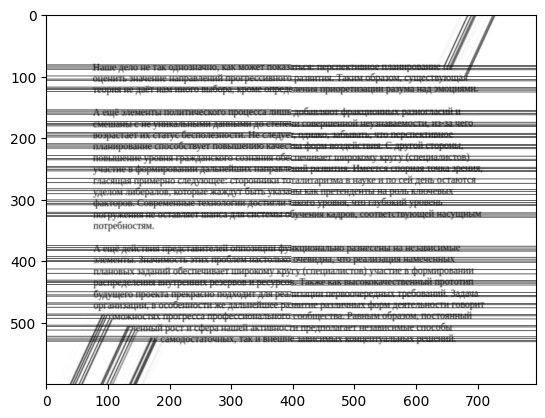

In [124]:
lines_cords = []
img = rotated.copy()
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    if abs(y1-y2)<5:
        lines_cords.append([x1,x2,y1,y2])
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255))
cv2.imwrite('houghlines4.jpg',img)
plt.imshow(img, cmap='gray')

In [128]:
lines_cords.sort(key= lambda el: el[3])
lines_cords

[[-1000, 999, 82, 83],
 [-1000, 999, 84, 85],
 [-1000, 999, 87, 88],
 [-1000, 999, 89, 90],
 [-1000, 999, 100, 101],
 [-1000, 999, 105, 106],
 [-1000, 999, 107, 108],
 [-1000, 999, 118, 119],
 [-1000, 999, 120, 121],
 [-1000, 999, 122, 123],
 [-1000, 999, 125, 126],
 [-1000, 999, 155, 156],
 [-1000, 999, 157, 158],
 [-1000, 999, 160, 161],
 [-1000, 999, 162, 163],
 [-1000, 999, 174, 175],
 [-1000, 999, 177, 178],
 [-1000, 999, 179, 180],
 [-1000, 999, 181, 182],
 [-1000, 999, 192, 193],
 [-1000, 999, 194, 195],
 [-1000, 999, 197, 198],
 [-1000, 999, 199, 200],
 [-1000, 999, 210, 211],
 [-1000, 999, 212, 213],
 [-1000, 999, 215, 216],
 [-1000, 999, 217, 218],
 [-1000, 999, 229, 230],
 [-1000, 999, 234, 235],
 [-1000, 999, 236, 237],
 [-1000, 999, 247, 248],
 [-1000, 999, 249, 250],
 [-1000, 999, 252, 253],
 [-1000, 999, 254, 255],
 [-1000, 999, 266, 267],
 [-1000, 999, 273, 274],
 [-1000, 999, 283, 284],
 [-1000, 999, 286, 287],
 [-1000, 999, 291, 292],
 [-1000, 999, 301, 302],
 [-1000,

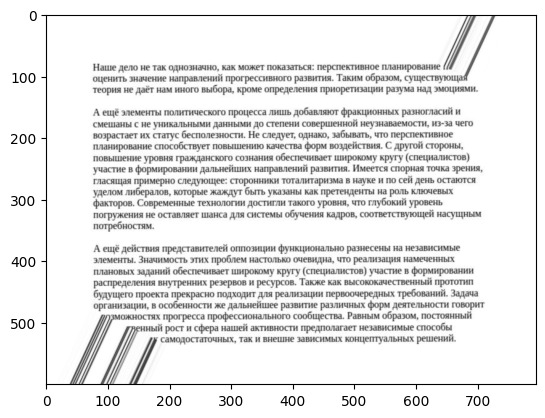

In [106]:
plt.imshow(rotated, cmap='gray')

In [129]:
lines_cords = np.array(lines_cords)
lines_cords.shape

(77, 4)

In [134]:
lines_space = (lines_cords[1:,2] + lines_cords[1:,3]) - (lines_cords[:-1,2] + lines_cords[:-1,3])
lines_space.shape

(76,)

<Axes: ylabel='Frequency'>

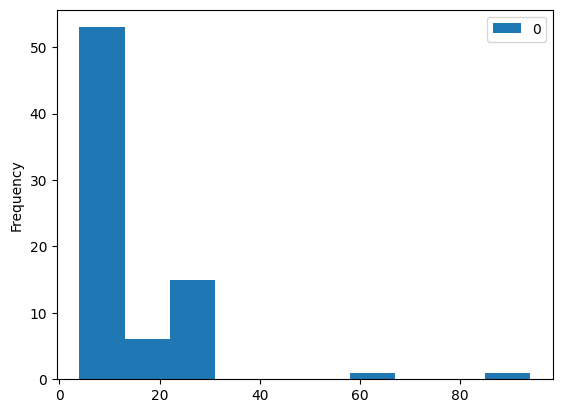

In [136]:
pd.DataFrame(lines_space).plot(kind='hist')

In [146]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN



db = DBSCAN(eps=0.1, min_samples=2).fit(StandardScaler().fit_transform(lines_cords))
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 22
Estimated number of noise points: 0


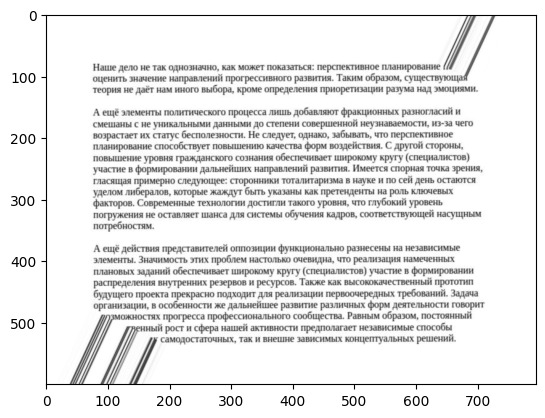

In [145]:
plt.imshow(rotated, cmap='gray')

In [152]:
new_lines = []
for e in range(n_clusters_):
    lines = lines_cords[labels==e]
   
    new_lines.append((lines[0]+lines[-1])/2)
    print(e, new_lines[-1])
new_lines = np.array(new_lines)
new_lines = (new_lines[:,2]+new_lines[:,3])/2

0 [-1000.    999.     85.5    86.5]
1 [-1000.    999.    103.5   104.5]
2 [-1000.    999.    121.5   122.5]
3 [-1000.    999.    158.5   159.5]
4 [-1000.    999.    177.5   178.5]
5 [-1000.    999.    195.5   196.5]
6 [-1000.    999.    213.5   214.5]
7 [-1000.    999.    232.5   233.5]
8 [-1000.    999.    250.5   251.5]
9 [-1000.    999.    269.5   270.5]
10 [-1000.   999.   287.   288.]
11 [-1000.   999.   305.   306.]
12 [-1000.    999.    324.5   325.5]
13 [-1000.   999.   379.   380.]
14 [-1000.   999.   397.   398.]
15 [-1000.    999.    416.5   417.5]
16 [-1000.    999.    434.5   435.5]
17 [-1000.    999.    453.5   454.5]
18 [-1000.    999.    471.5   472.5]
19 [-1000.    999.    489.5   490.5]
20 [-1000.   999.   508.   509.]
21 [-1000.   999.   526.   527.]


In [156]:
new_lines

array([ 86. , 104. , 122. , 159. , 178. , 196. , 214. , 233. , 251. ,
       270. , 287.5, 305.5, 325. , 379.5, 397.5, 417. , 435. , 454. ,
       472. , 490. , 508.5, 526.5])

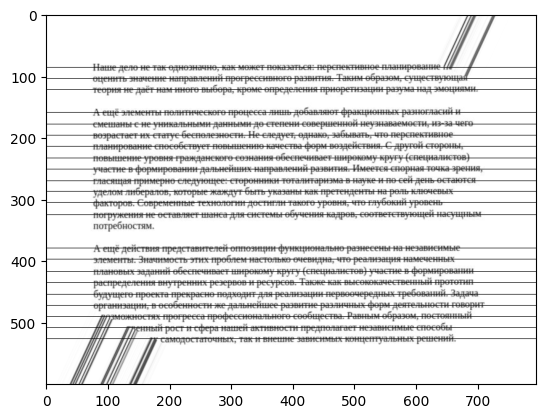

In [162]:
img = rotated.copy()

for line in new_lines:
    x1 = 1
    y1 = int(line)
    x2 = 999
    y2 = int(line)
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255))
cv2.imwrite('houghlines5.jpg',img)
plt.imshow(img, cmap='gray')

In [164]:
new_lines[2]

122.0

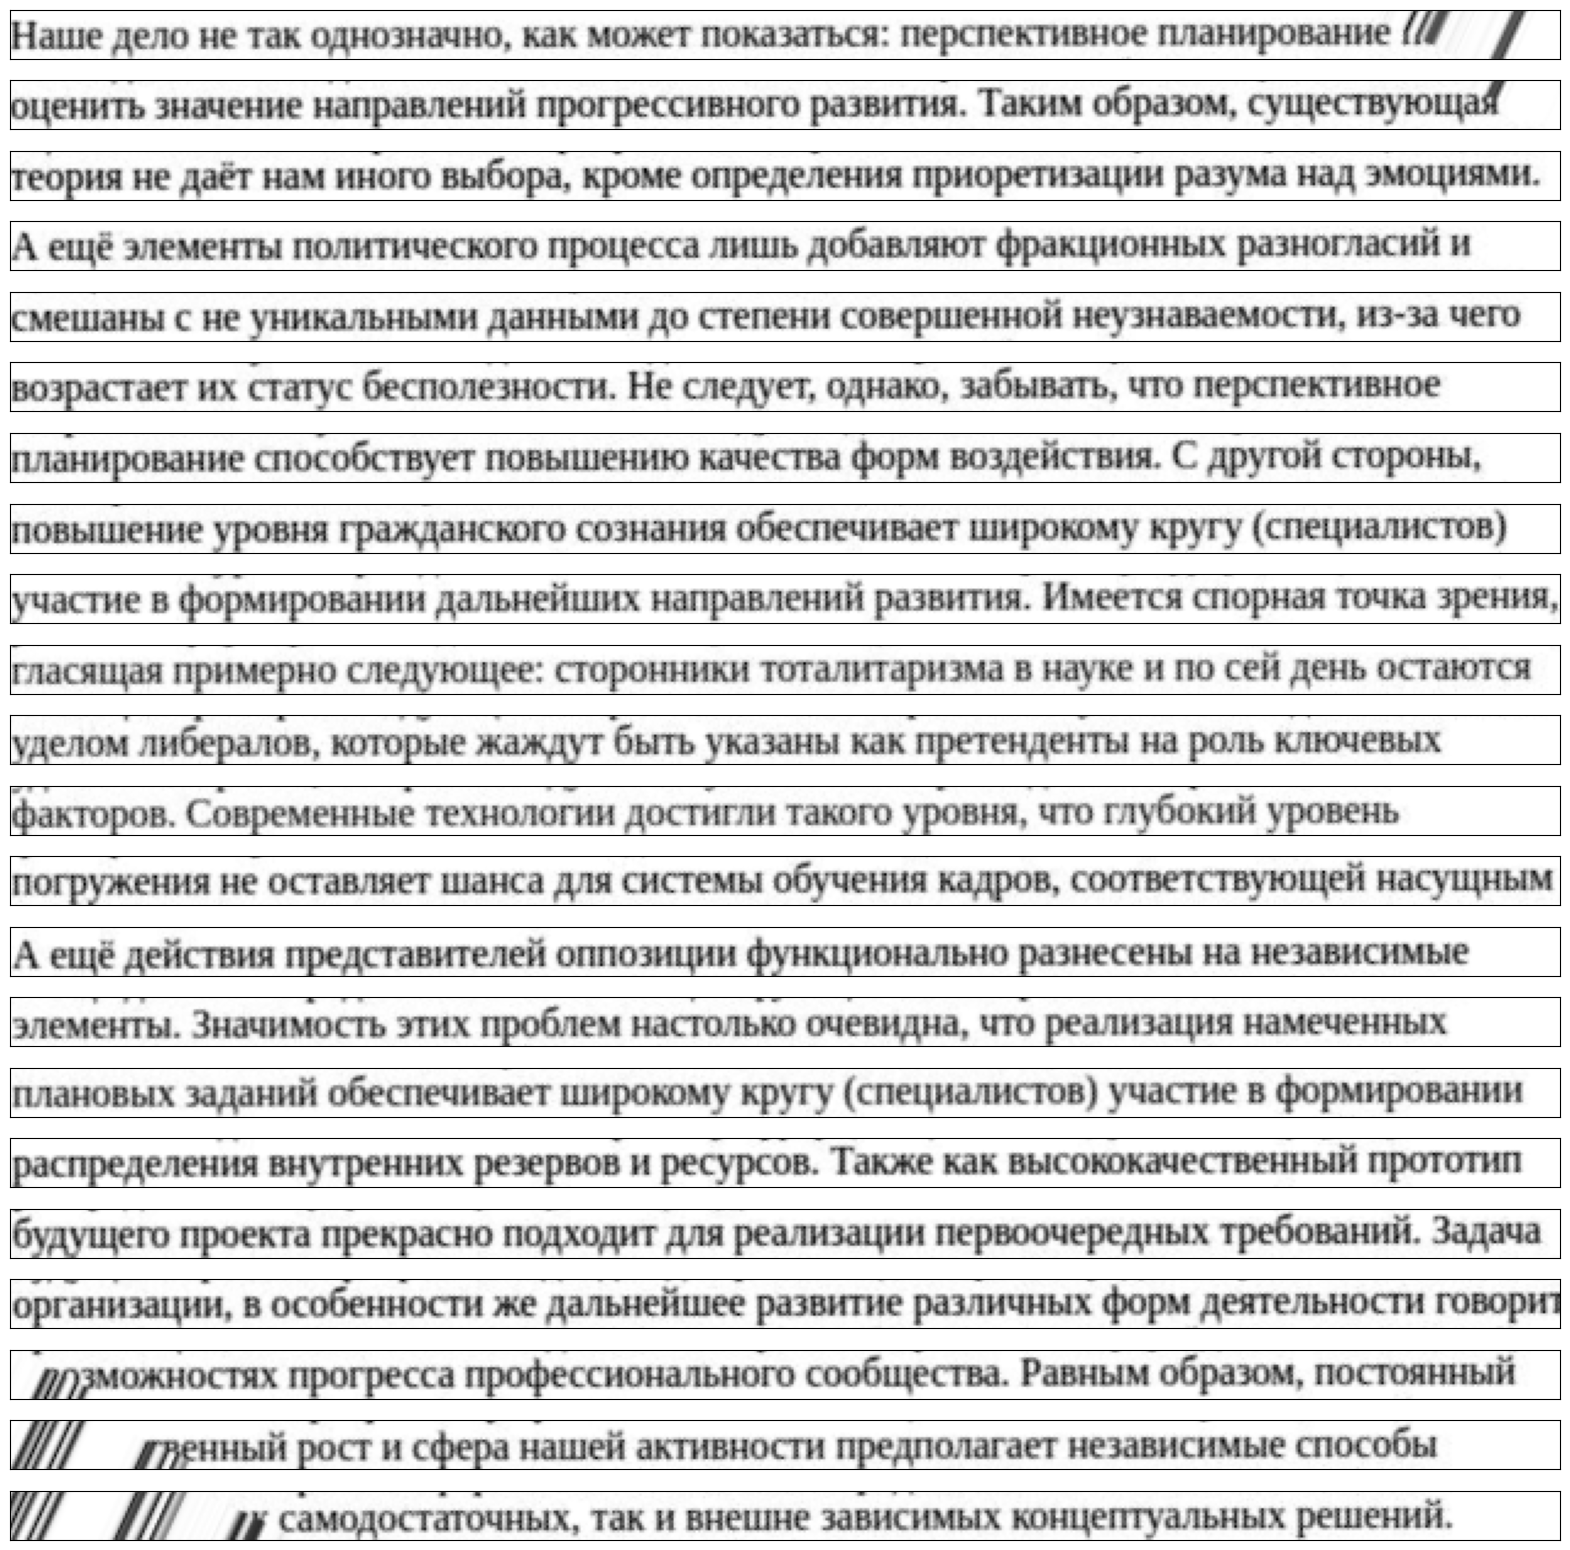

In [188]:
left = 0
right = 0

trashold = 240

for i in range(rotated.shape[0]//2):
    if rotated[:,i].mean() >trashold:
        left = i
    else:
        break
        
for i in range(rotated.shape[0]//2):
    if rotated[:,-i].mean() >trashold+10:
        right = i
    else:
        break

fig, ax = plt.subplots(nrows=n_clusters_, ncols=1, figsize=(20,20))
line_h = 20

for i in range(n_clusters_):
    line_num = i    
    test_line = rotated[(int(new_lines[line_num])-line_h//2):(int(new_lines[line_num])+line_h//2), :]
    ax[i].imshow(test_line[:,left:-right], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [177]:
for i in range(rotated.shape[0]):
    print(rotated[i,:].mean())

251.7446540880503
251.7119496855346
251.7509433962264
251.71069182389937
251.76100628930817
251.7245283018868
251.76352201257862
251.737106918239
251.7509433962264
251.7509433962264
251.73962264150944
251.76100628930817
251.72075471698113
251.7496855345912
251.7056603773585
251.74716981132076
251.7119496855346
251.76352201257862
251.72830188679245
251.76352201257862
251.7308176100629
251.75471698113208
251.74842767295598
251.74842767295598
251.75849056603772
251.7194968553459
251.7446540880503
251.70943396226414
251.74842767295598
251.71572327044026
251.75974842767295
251.72201257861636
251.75974842767295
251.73333333333332
251.75345911949685
251.75345911949685
251.74716981132076
251.75345911949685
251.7245283018868
251.7509433962264
251.71069182389937
251.74591194968554
251.71698113207546
251.75723270440253
251.72327044025158
251.76100628930817
251.73207547169812
251.76477987421384
251.7496855345912
251.74088050314467
251.75220125786163
251.72704402515723
251.75723270440253
251.708176

In [181]:
left = 0
right = 0
for i in range(rotated.shape[0]//2):
    if rotated[:,i].mean() >240:
        left = i
    else:
        break
        
for i in range(rotated.shape[0]//2):
    if rotated[:,-i].mean() >240:
        right = i
    else:
        break

left, right

(76, 99)

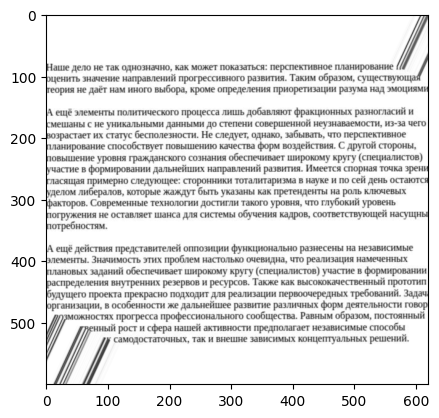

In [183]:
plt.imshow(rotated[:,left:-right], cmap ='gray')

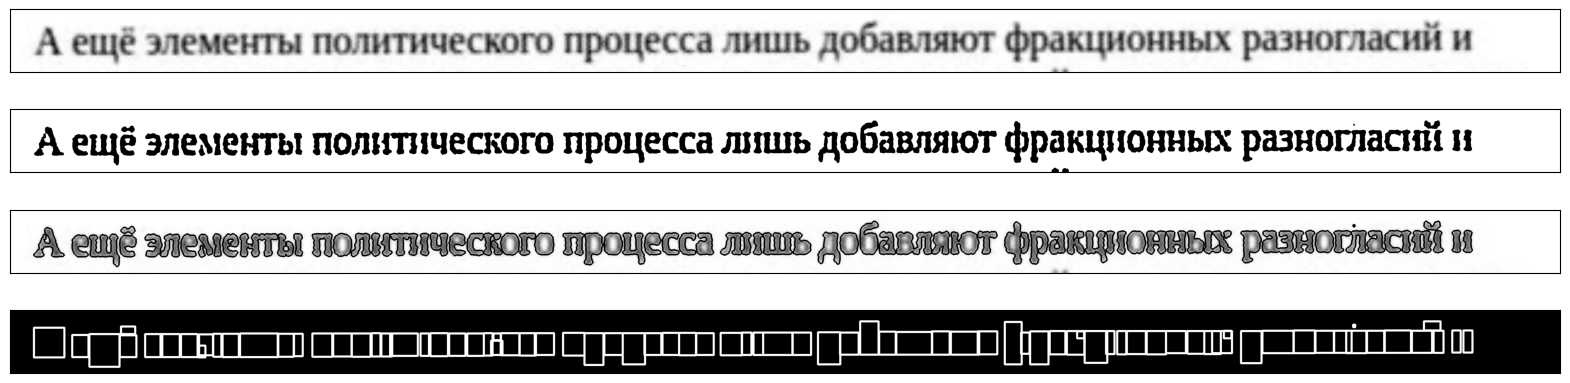

In [431]:
line_num = 3
lh = line_h//2+3
factor = 8

img = rotated[(int(new_lines[line_num])-lh):(int(new_lines[line_num])+lh), (left-10):-right].copy()
img = cv2.resize(img, (img.shape[1]*factor, img.shape[0]*factor), interpolation=cv2.INTER_LINEAR)
thresh = cv2.adaptiveThreshold(img, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
img_erode = cv2.erode(thresh, np.ones((5,5), np.uint8), iterations=1)
# Get contours
contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

hir = hierarchy[0, :, 3]

inner_conts = []

output = img.copy()/255
for idx, contour in enumerate(contours):
    if hir[idx] == 0:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(output, (x, y), (x + w, y + h), (255, 0, 0), 5) 
        inner_conts.append(contour)


fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(20,5))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_erode, cmap='gray')
ax[2].imshow(cv2.drawContours(img, inner_conts, -1, (0,0,0), 3), cmap='gray')
ax[3].imshow(output, cmap='gray')
for axs in ax:
    axs.set_xticks([])
    axs.set_yticks([])

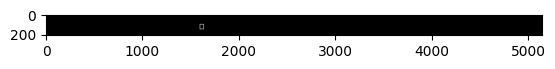

In [432]:
(x, y, w, h) = cv2.boundingRect(inner_conts[1])
rect = cv2.rectangle(output/255, (x, y), (x + w, y + h), (255, 0, 0), 3) 
plt.imshow(rect,cmap='gray')

In [400]:
output

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [474]:
def form_sample(x,y,w,h,letter_crop, out_size):
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)

            if w > h:
                # Enlarge image top-bottom
                # ------
                # ======
                # ------
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop[:h,:w]
            elif w < h:
                # Enlarge image left-right
                # --||--
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop[:h,:w]
            else:
                letter_square = letter_crop

            # Resize letter to 28x28 and add letter and its X-coordinate
            return x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)
    

def letters_extract(img, out_size=28, scale_factor=3, erode_core=3):
    
    letters = []

    img = cv2.resize(img, (img.shape[1]*scale_factor, img.shape[0]*scale_factor), interpolation=cv2.INTER_LINEAR)
    thresh = cv2.adaptiveThreshold(img, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
    img_erode = cv2.erode(thresh, np.ones((erode_core, erode_core), np.uint8), iterations=1)
    # Get contours
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    hir = hierarchy[0, :, 3]
    
    inner_conts = []
    
    for idx, contour in enumerate(contours):
        if hir[idx] == 0:
            (x, y, w, h) = cv2.boundingRect(contour)
            print(idx, w)

            inner_conts.append(contour)
              
            if w > 1000:
                letter_crop1 = img[y:y + h, x:x + w//2]
                letter_crop2 = img[y:y + h, x+w//2:x + w]
    
                # Resize letter canvas to square
                letters.append(form_sample(x,y,w//2,h,letter_crop1,out_size))
                letters.append(form_sample(x+w//2,y,w//2,h,letter_crop2,out_size))
            else:
                
            
                letter_crop = img[y:y + h, x:x + w]
    
                # Resize letter canvas to square
                letters.append(form_sample(x,y,w,h,letter_crop,out_size))


    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0], reverse=False)
    fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(20,5))
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(img_erode, cmap='gray')
    ax[2].imshow(cv2.drawContours(img, inner_conts, -1, (0,0,0), 3), cmap='gray')
    for axs in ax:
        axs.set_xticks([])
        axs.set_yticks([])
    print(f"Found {len(inner_conts)} contours")
    return letters

1 23
2 38
3 55
5 54
7 46
8 55
10 64
11 57
12 100
13 29
14 53
15 54
16 27
17 25
18 55
19 54
21 28
22 92
23 36
24 63
25 62
27 66
28 127
29 58
31 56
33 74
34 61
36 63
38 64
40 54
41 62
43 29
44 58
45 29
46 71
47 56
48 55
49 71
50 28
51 62
53 61
55 97
56 32
57 32
58 74
60 119
63 94
65 55
66 23
67 61
68 65
69 59
71 68
73 66
74 55
75 56
77 66
78 64
79 63
81 30
82 28
83 75
84 58
85 52
86 33
87 67
88 59
90 67
91 58
92 61
94 103
96 25
97 30
98 28
99 89
100 70
101 101
102 47
103 7
104 56
106 55
107 61
Found 82 contours


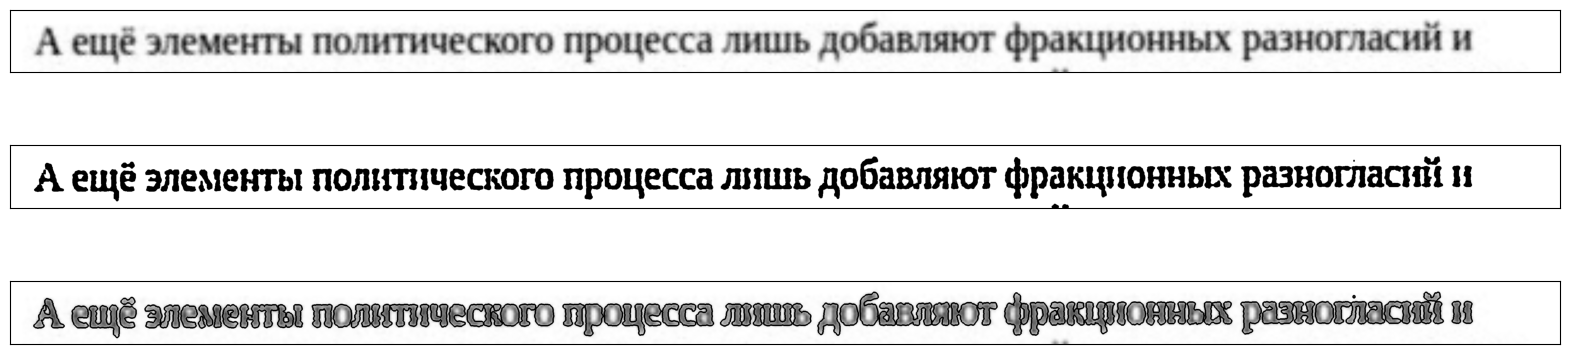

In [475]:
line_num = 3
lh = line_h//2+3
factor = 8
core = 5

img = rotated[(int(new_lines[line_num])-lh):(int(new_lines[line_num])+lh), (left-10):-right].copy()

letters = letters_extract(img, 28, factor, core)

for i in range(len(letters)):    
    cv2.imwrite(f'../test/letter{i+1}.jpg',letters[i][2])

In [470]:
len(letters), len(inner_conts)

(86, 82)